# Predicting Hand Written Digits 

Data sourced from established database from UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)

The objective of this project is to predict the effectiveness of Machine Learning models (i.e. K-Nearest Neighbors vs Neural Networks) on handwritten numeric digits images. This project extracts data from University of California Irvine's Machine Learning Repository for exploration. Thanks to well established database from UCI, no data cleaning was required. 

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()

In [2]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


split digits data into data (features) and labels respectively

In [3]:
labels = pd.Series(digits['target'])
data = pd.DataFrame(digits['data'])

To verify the process, extract first image to see if the it shows properly

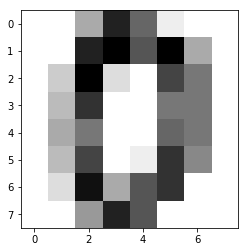

In [4]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap ='gray_r')

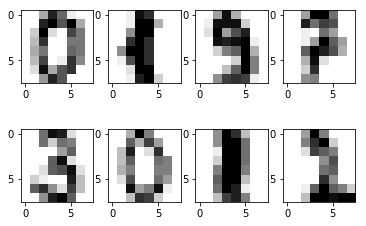

In [5]:
f, axarr = plt.subplots(2,4)
axarr[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap ='gray_r')
axarr[0,1].imshow(data.iloc[99].values.reshape(8,8), cmap = 'gray_r')
axarr[0,2].imshow(data.iloc[199].values.reshape(8,8), cmap = 'gray_r')
axarr[0,3].imshow(data.iloc[299].values.reshape(8,8), cmap = 'gray_r')

axarr[1,0].imshow(data.iloc[999].values.reshape(8,8), cmap = 'gray_r')
axarr[1,1].imshow(data.iloc[1099].values.reshape(8,8), cmap = 'gray_r')
axarr[1,2].imshow(data.iloc[1199].values.reshape(8,8), cmap = 'gray_r')
axarr[1,3].imshow(data.iloc[1299].values.reshape(8,8), cmap = 'gray_r')

# K-Nearest Neighbors Model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

#50% Test/Train selection

#Function for Initiating K-NN training Model
def train_knn(nneighbors, train_data, train_labels):
    knn_model = KNeighborsClassifier(n_neighbors = nneighbors)
    knn_model.fit(train_data, train_labels)
    return knn_model

#Function for Test model
def test(knn, test_data, test_labels):
    predictions = knn.predict(test_data)
    train_test_df = pd.DataFrame()
    train_test_df['correct label'] = test_labels
    train_test_df['predicted label'] = predictions
    overall_accuracy = sum(train_test_df['correct label'] == train_test_df['predicted label'])/ len(train_test_df['predicted label'])
    return overall_accuracy

def cross_validate(k):
    kf_accuracy = []
    kf = KFold(n_splits = 4, random_state = 2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_labels, test_labels = labels.iloc[train_index], labels.iloc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        kf_accuracy.append(overall_accuracy)
    return kf_accuracy

knn_one_accuracy = cross_validate(1)
np.mean(knn_one_accuracy)
    

0.9677233358079684

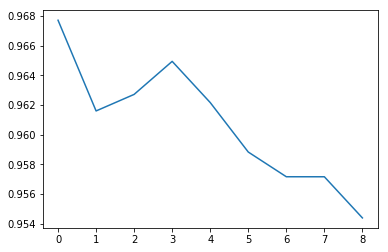

In [7]:
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracy = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracy)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.plot(k_overall_accuracies)

# Summary

The accuracy of K-Nearest Neighbors model stands at 96%. 

The performance of KNN accuracy reduces as the k value increases.

# Neural Network with Single Hidden Layer

/Users/try/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/try/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/try/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/try/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

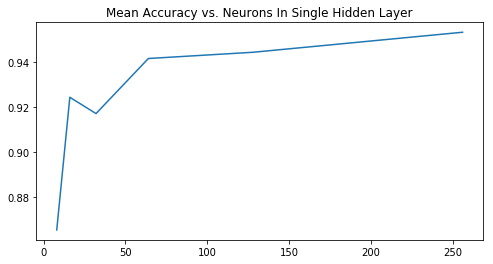

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

#50% Train/Test Split
def train_nn(neuron_arch, train_features, train_labels):
    nn_model = MLPClassifier(hidden_layer_sizes = neuron_arch)
    nn_model.fit(train_features, train_labels)
    return nn_model

def test_nn(nn_model, test_features, test_labels):
    nn_accuracies = []
    predictions = nn_model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct label'] = test_labels
    train_test_df['predicted label'] = predictions
    accuracy = sum(train_test_df['correct label'] == train_test_df['predicted label'])/len(train_test_df)
    nn_accuracies.append(accuracy)
    return nn_accuracies

def cross_validate(neuron_arch):
    kf_accuracy = []
    kf = KFold(n_splits = 4, random_state = 2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_labels, test_labels = labels.iloc[train_index], labels.iloc[test_index]
        nn_model = train_nn(neuron_arch, train_features, train_labels)
        nn_accuracies = test_nn(nn_model, test_features, test_labels)
        kf_accuracy.append(nn_accuracies)
    return kf_accuracy

neuron_arch = [(8,),(16,),(32,),(64,),(128,),(256,)]

nn_overall_accuracies = []

for neuron in neuron_arch:
    nn_accuracies = cross_validate(neuron)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_overall_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in neuron_arch]
plt.plot(x, nn_overall_accuracies)


# Summary

It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 86% to approximately 94%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 96% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

# Neural Network with 2 Hidden Layers

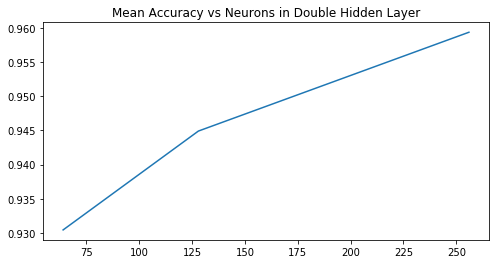

In [13]:
neurons_arch = [(64,64),(128,128), (256,256)]

nn_2_layers_overall_accuracies = []

for neuron in neurons_arch:
    nn_accuracies = cross_validate(neuron)
    nn_2_layers_mean_accuracy = np.mean(nn_accuracies)
    nn_2_layers_overall_accuracies.append(nn_2_layers_mean_accuracy)
    
plt.figure(figsize =(8,4))
plt.title("Mean Accuracy vs Neurons in Double Hidden Layer")

x = [i[0] for i in neurons_arch]
plt.plot(x , nn_2_layers_overall_accuracies)


# Summary

Using 2 hidden layers improved our simple accuracy to 95%. Athough there is a possibility of overfitting, however by applying K-Fold Cross Validation gave the assurance that generalization has been made to achieve the extra 1%.

/Users/try/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/try/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/try/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/try/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

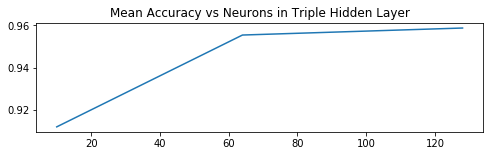

In [14]:
def new_cross_validate(neuron_arch):
    kf_accuracy = []
    kf = KFold(n_splits = 6, random_state = 2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_labels, test_labels = labels.iloc[train_index], labels.iloc[test_index]
        nn_model = train_nn(neuron_arch, train_features, train_labels)
        nn_accuracies = test_nn(nn_model, test_features, test_labels)
        kf_accuracy.append(nn_accuracies)
    return kf_accuracy

three_layers_neurons = [(10,10,10),(64,64,64), (128,128,128)]

three_layers_overall_nn_accuracies = []

for neuron in three_layers_neurons:
    nn_accuracies = new_cross_validate(neuron)
    nn_mean_three_layers_accuracy = np.mean(nn_accuracies)
    three_layers_overall_nn_accuracies.append(nn_mean_three_layers_accuracy)
    
plt.figure(figsize = (8,2))
plt.title("Mean Accuracy vs Neurons in Triple Hidden Layer")

x = [i[0] for i in three_layers_neurons]
plt.plot(x, three_layers_overall_nn_accuracies)

# Summary

Using 3 hidden layers improved our simple accuracy to 96%, even with 6-fold cross validation. This is inline with typical understanding with research literature that accuracy is proportionate to # of hidden layers.